Se usó ChatGPT para el brainstorming y GitHub Copilot para el autocompletado en la 3 y en esta.

Se utilizó dijkstra para encontrar la ruta más corta entre dos nodos en un grafo con aristas positivas

In [3]:
# Definir las zonas y rutas
import numpy as np

# Número de zonas
zonas = 6

# Matriz de tiempos base (en minutos)
tiempos_base = np.array([
    [0, 10, 15, 20, 25, 30],
    [10, 0, 35, 25, 30, 5],
    [15, 35, 0, 30, 5, 10],
    [20, 25, 30, 0, 10, 15],
    [25, 30, 5, 10, 0, 20],
    [30, 5, 10, 15, 20, 0]
])

# Matriz de factores climáticos (en minutos)
factores_climaticos = np.array([
    [0, 5, 10, 3, 8, 2],
    [5, 0, 4, 3, 6, 1],
    [10, 4, 0, 7, 3, 2],
    [3, 3, 7, 0, 4, 5],
    [8, 6, 3, 4, 0, 6],
    [2, 1, 2, 5, 6, 0]
])

# Calcular la matriz de tiempos totales
tiempos_totales = tiempos_base + factores_climaticos
print("Matriz de tiempos totales (base + clima):")
print(tiempos_totales)


Matriz de tiempos totales (base + clima):
[[ 0 15 25 23 33 32]
 [15  0 39 28 36  6]
 [25 39  0 37  8 12]
 [23 28 37  0 14 20]
 [33 36  8 14  0 26]
 [32  6 12 20 26  0]]


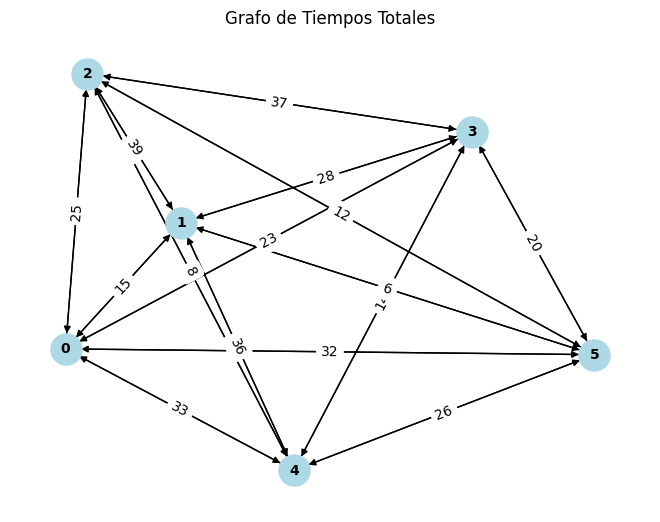

In [6]:
import networkx as nx

import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos
for i in range(zonas):
    G.add_node(i)

# Añadir aristas con pesos
for i in range(zonas):
    for j in range(zonas):
        if tiempos_totales[i, j] > 0:
            G.add_edge(i, j, weight=tiempos_totales[i, j])

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Grafo de Tiempos Totales")
plt.show()

In [4]:
import heapq

def dijkstra(tiempos, inicio, destino):
    # Número de nodos
    n = len(tiempos)
    
    # Distancias mínimas inicializadas en infinito
    distancias = [float('inf')] * n
    distancias[inicio] = 0  # Distancia al nodo inicial es 0
    
    # Cola de prioridad para seleccionar el nodo con menor distancia
    pq = [(0, inicio)]  # (distancia acumulada, nodo)
    
    # Pista de predecesores para reconstruir la ruta
    predecesores = [-1] * n
    
    while pq:
        distancia_actual, nodo_actual = heapq.heappop(pq)
        
        # Si llegamos al nodo destino, salimos
        if nodo_actual == destino:
            break
        
        # Explorar vecinos
        for vecino in range(n):
            if tiempos[nodo_actual][vecino] > 0:  # Existe conexión
                nueva_distancia = distancia_actual + tiempos[nodo_actual][vecino]
                
                # Si encontramos una mejor distancia
                if nueva_distancia < distancias[vecino]:
                    distancias[vecino] = nueva_distancia
                    predecesores[vecino] = nodo_actual
                    heapq.heappush(pq, (nueva_distancia, vecino))
    
    # Reconstruir la ruta
    ruta = []
    nodo = destino
    while nodo != -1:
        ruta.append(nodo)
        nodo = predecesores[nodo]
    
    ruta.reverse()  # La ruta se construyó al revés
    
    return distancias[destino], ruta


In [5]:
# Zona de inicio y destino
inicio = 0
destino = 5

# Ejecutar el algoritmo de Dijkstra
tiempo_minimo, ruta_optima = dijkstra(tiempos_totales, inicio, destino)

# Mostrar resultados
print(f"Tiempo mínimo de viaje: {tiempo_minimo} minutos")
print(f"Ruta óptima: {' -> '.join(map(str, ruta_optima))}")


Tiempo mínimo de viaje: 21 minutos
Ruta óptima: 0 -> 1 -> 5


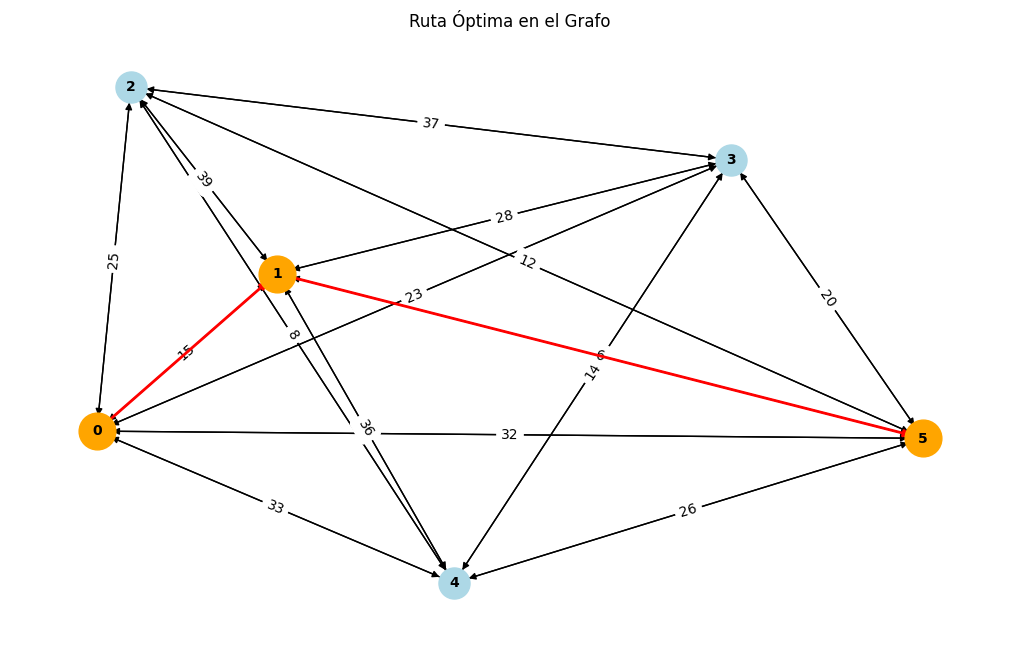

In [7]:
# Dibujar el grafo con la ruta óptima resaltada
plt.figure(figsize=(10, 6))

# Dibujar todos los nodos y aristas
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Resaltar la ruta óptima
ruta_edges = [(ruta_optima[i], ruta_optima[i+1]) for i in range(len(ruta_optima)-1)]
nx.draw_networkx_nodes(G, pos, nodelist=ruta_optima, node_color='orange', node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=ruta_edges, edge_color='red', width=2)

plt.title("Ruta Óptima en el Grafo")
plt.show()